# 큐(Queue)란?
***
- 큐는 선입선출(FIFO)의 자료구조이다.

- 선형적인 구조이다. (서비스를 받는 것을 염두)
***

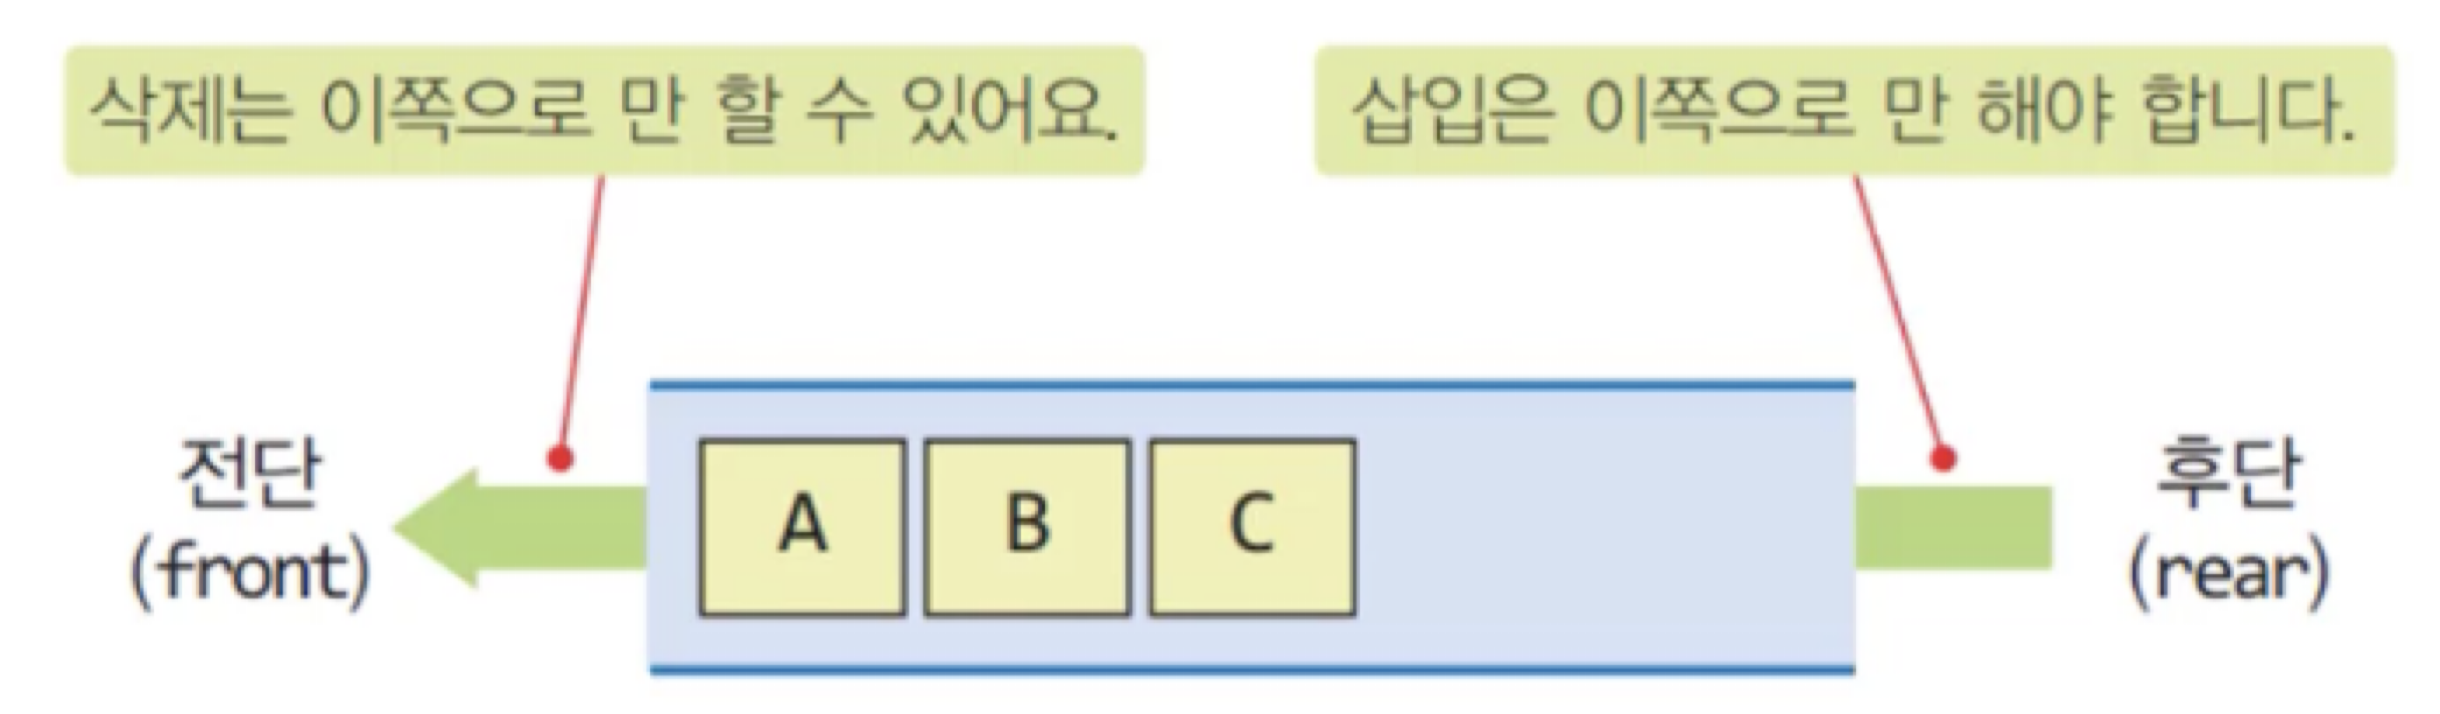

# 큐 ADT

삽입과 삭제는 FIFO순서를 따른다.
삽입은 큐의 후단에, 삭제는 전단에서 이루어진다.
***
* `Queue()` : 비어 있는 새로운 큐를 만든다.
* `isEmpty()` : 항목 x를 큐의 맨 뒤에 추가한다.
* `enqueue()` : 큐의 맨 앞에 있는 항목을 꺼내 반환한다.
* `dequeue()` : 큐의 맨 앞에 있는 항목을 꺼내 반환한다.
* `peek()` : 큐의 맨 앞에 있는 항목을 삭제하지 않고 반환
* `size()` : 큐의 모든 항목들의 개수를 반환
* `clear()` : 큐를 공백상태
***

## 큐의 연산
***
- 삽입 : enqueue()
- 삭제 : dequeue()
***

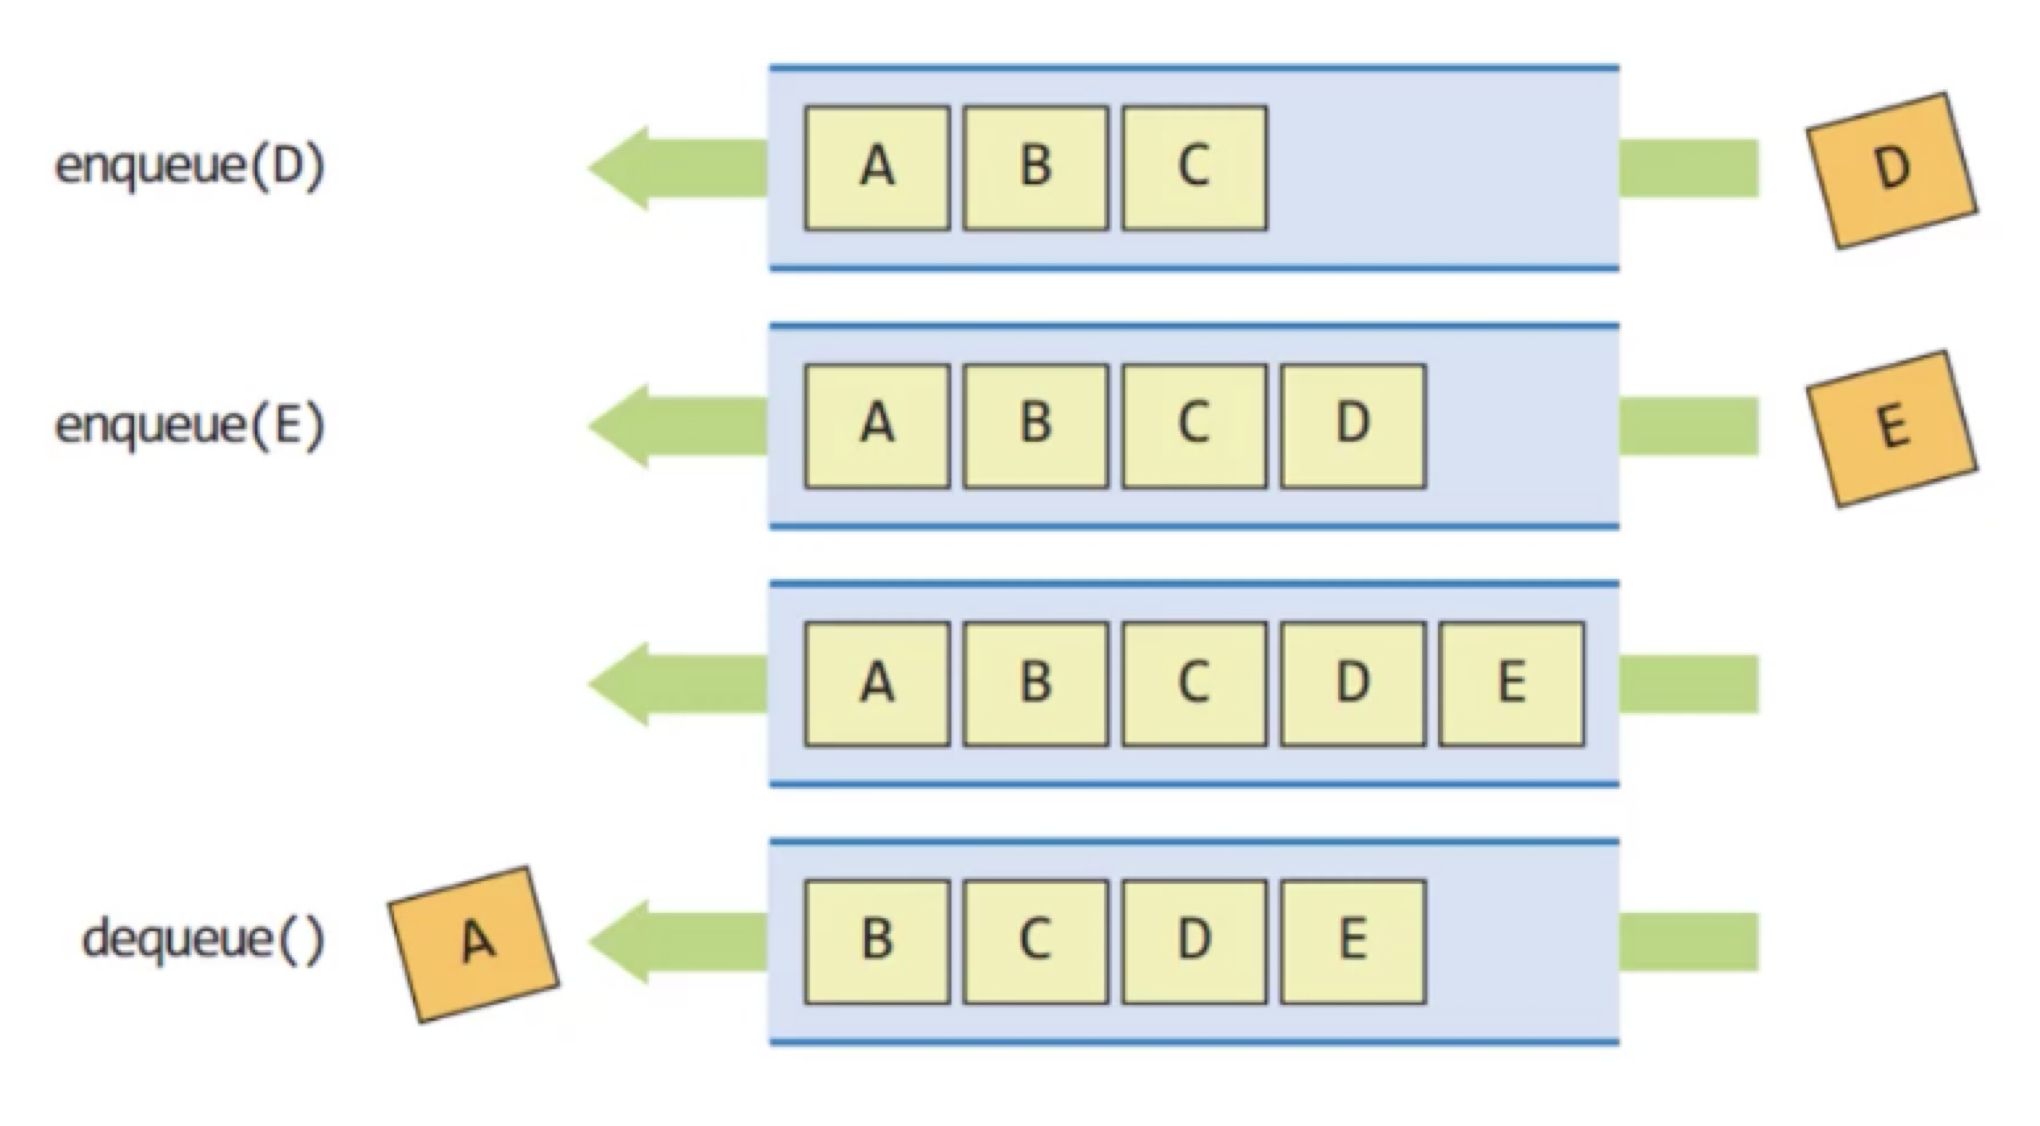

# 선형큐의 문제점
***
- 선형큐의 비효율성
***

- enqueue(item): 삽입연산 -> O(1)

In [3]:
def enqueue(item):
    item.append(item) # 리스트 맨뒤에 item 추가


- dequeue() : 삭제 연산 -> O(n)

In [1]:
def dequeue():
    if not isEmpty(): #공백상태가 아니면
        return items.pop(0) #맨 앞 항목을 꺼내서 반환

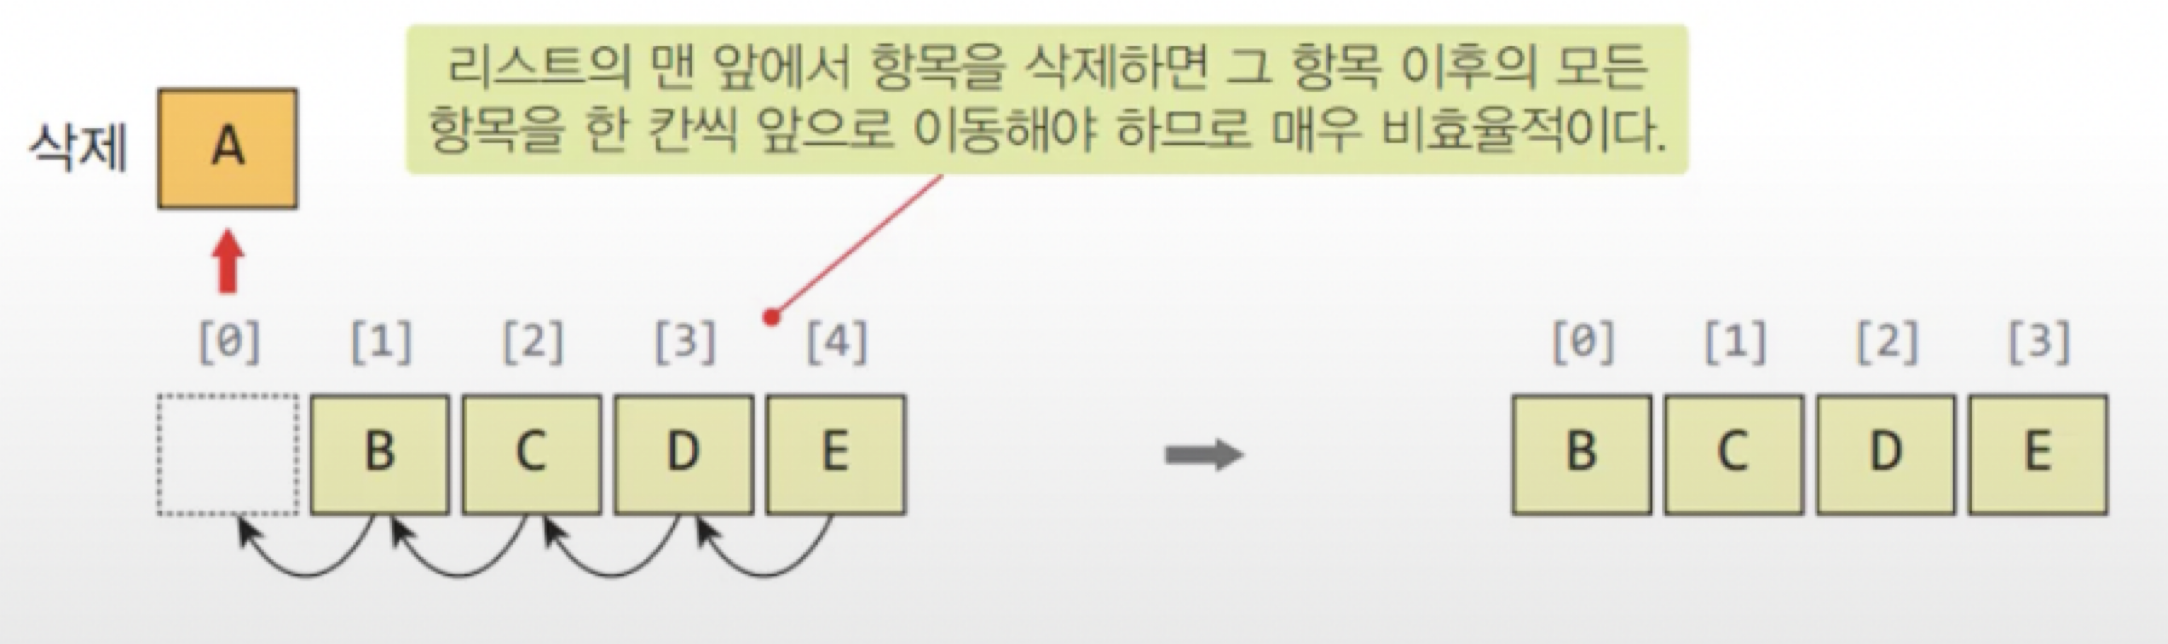

## 원형 큐의 효율적
***

원형큐
- 배열을 원형으로 사용

전단과 후반을 위한 2개의 변수
- front : 첫번쨰 요소 하나 앞의 인덱스
- rear : 마지막 요소의 인덱스

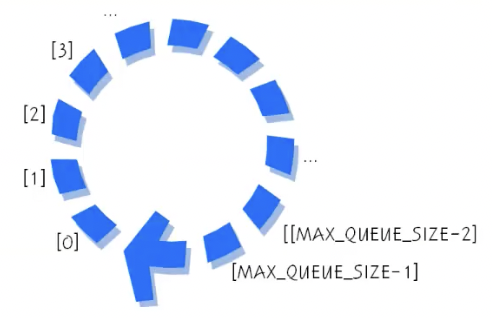

- 맨 앞 데이터와 맨뒤 데이터 큐가 물려있다.
- 인덱스가 움직임

- 회전(시계방향) 방법 / 전단과 후단을 위한 2개의 변수


```
front <- (front +1) % MAX_QSIZE
rear <-(rear + 1)% MAX_QSIZE
```



- 핵심아이디어 % (모두연상자)를 사용한다
- 1 % 3 = 1
- 2 % 3 = 2
- 3 % 3 = 0

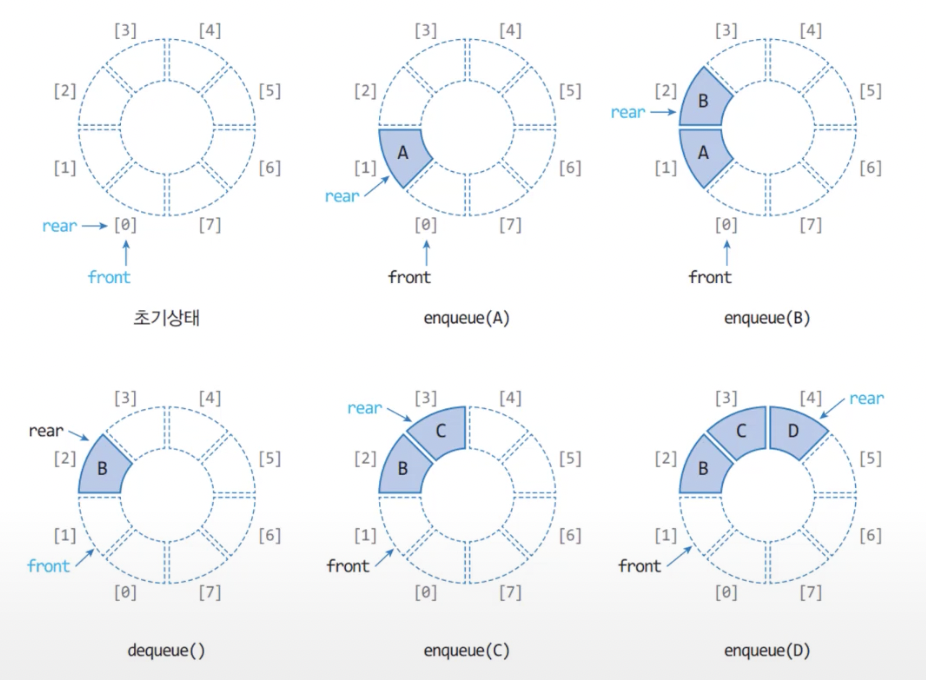

공백상태와 포화상태
***


```
- 공백상태 : front == rear
- 포화상태: front == (rear +1)% MAX_QSIZE
```



- 공백상태와 포화상태를 구별 방법은?
- 하나의 공간은 항상 비워둠

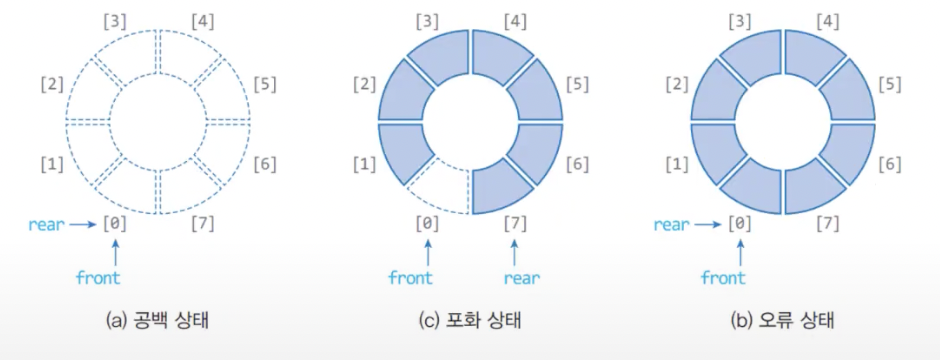

- 파이썬 리스트 사용
- 리스트의 크기가 미리 결정 되어야함 -> 포화상태
- 원형 큐 클래스

In [7]:
MAX_QSIZE = 10 # 원형 큐의 크기

class CircularQueue :
    def __init__(self):   # CircularQueue 생성자
        self.front = 0 #큐의 전단 위치
        self.rear = 0 # 큐의 후단 위치
        self.item = [None] * MAX_QSIZE # 항목 저장용 리스트

    def isEmpty(self) : return self.front == self.rear
    def isFull(self): return self.front == (self.rear + 1) % MAX_QSIZE
    def clear(self) : self.front = self.rear

    def enqueue(self, item):
      if not self.isFull(): #포화상태가 아니면
        self.rear = (self.rear + 1) % MAX_QSIZE # rear 회전
        self.items[self.rear] = item #rear 위치에 삽입

    def dequeue( self ):
      if not self.isEmpty():
          self.front = (self.front +1 ) % MAX_QSIZE  #front 회전
          return self.items[self.front]  # front위치의 항목 반환

    def peek(self):
      if not self.isEmpty():
          return self.items[(self.front + 1) % MAX_QSIZE]

    def size(self):
      return (self.rear - self.front + MAX_QSIZE) % MAX_QSIZE

In [ ]:
#원형 큐의 연산들 (출력)

def display(self) :
        out = []

        if self.front < self.rear: #  front 값이 rear 값보다 작은경우
          out = self.items[self.front + 1 : self.rear+1]    # 슬라이싱

        else:
          out = self.items[self.front +1 : MAX_QSIZE]  ₩  #  front 값이 rear 값보다 큰 경우
          + self.items[0:self.rear+1]         #슬라이싱

        print("[f=%s, r=%d) ==> " %(self.front, self.rear), out)


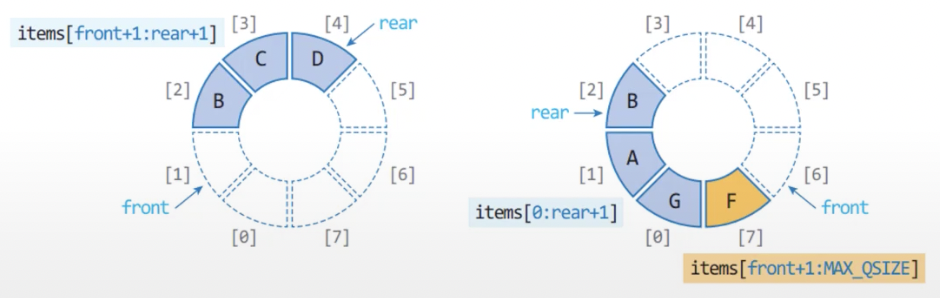

# 교재 CODE
***

In [10]:
class MyCircularQueue:
    def __init__(self, k: int):
        self.q = [None] * k
        self.maxlen = k
        self.p1 = 0 #pront
        self.p2 = 0 # rear

    # enQueue(): 리어 포인터 이동
    def enQueue(self, value: int) -> bool:
        if self.q[self.p2] is None:
            self.q[self.p2] = value
            self.p2 = (self.p2 + 1) % self.maxlen
            return True
        else:
            return False

    # deQueue(): 프론트 포인터 이동
    def deQueue(self) -> bool:
        if self.q[self.p1] is None:
            return False
        else:
            self.q[self.p1] = None
            self.p1 = (self.p1 + 1) % self.maxlen
            return True

    def Front(self) -> int:
        return -1 if self.q[self.p1] is None else self.q[self.p1]

    def Rear(self) -> int:
        return -1 if self.q[self.p2 - 1] is None else self.q[self.p2 - 1]

    def isEmpty(self) -> bool:
        return self.p1 == self.p2 and self.q[self.p1] is None

    def isFull(self) -> bool:
        return self.p1 == self.p2 and self.q[self.p1] is not None

# 우선순위 큐
***
실생활에서의 우선순위
- 도로에서의 자동차 우선순위

우선순위 큐
- 우선순위의 개념을 큐에 도입한 자료구조
- 모든 데이터가 우선순위를 가짐
- 입력 순서와 상관없이 우선순위가 높은 데이터가 먼저 출력

응용분야
- 시뮤레이션 , 네트워크 트래픽 제어 ...
***

# 데크
***
- 데크는 더블 엔디드 큐의 줄임말로, 글자 그대로 양쪽 끝을 모두 출할 수 있는 큐를 일반화한 형태의 `추상 자료형`(ADT)이다.

- 파이썬은 데크 자료형을 다음과 같이 `collections` 모듈에서 `deque` 라는 이릅으로 지원
***

In [22]:
import collections

d = collections.deque()

type(d)

collections.deque